# Create images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1.   Create the image of paraboloid with one axis scaled (like an oval paraboloid).

Parabolóide da imagem:

$x^2 + (\frac{3y}{2})^2 - z = 0$

In [2]:
x = np.linspace(-1, 1, 100)
y = x.copy()

x, y = np.meshgrid(x, y)

z = (x**2 + (3*y/2)** 2)

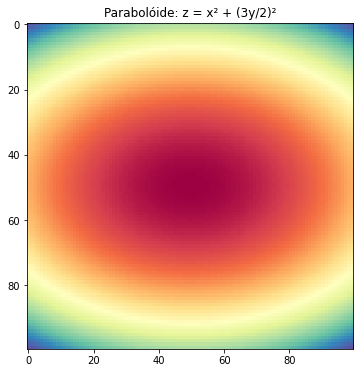

In [3]:
fig = plt.figure(figsize = (6, 6))
plt.imshow(z, cmap='Spectral')
plt.title('Parabolóide: z = x² + (3y/2)²')
plt.show()

## 2.   Create the image of a rotated sin using of coordinates.

In [4]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = x.copy()

x, y = np.meshgrid(x, y)

theta = 60
theta_rad = theta * np.pi / 180

rotated_x = x*np.cos(theta_rad) + y*np.sin(theta_rad)

z1 = np.sin(x)
z2 = np.sin(rotated_x)

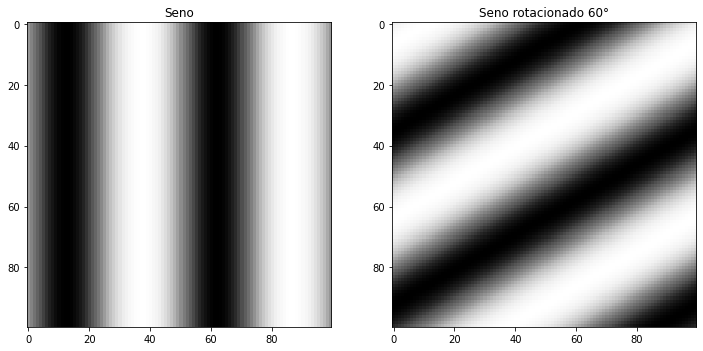

In [5]:
fig = plt.figure(figsize = (12, 6))
fig.add_subplot(121)
plt.title('Seno')
plt.imshow(z1, cmap='Greys')
fig.add_subplot(122)
plt.title(f'Seno rotacionado {theta}°')
plt.imshow(z2, cmap='Greys')
plt.show()

## 3.   Create the imagem of a gaussian.

Gaussiana:

$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-μ}{\sigma})²}$

In [6]:
x = np.linspace(-1, 1, 100)
y = x.copy()

x, y = np.meshgrid(x, y)

m = 0  # Média
s = 0.5  # Desvio padrão

x_exp_gaussian = ((x - m) / s) ** 2
y_exp_gaussian = ((y - m) / s) ** 2

gaussian = np.exp(-1/2 * (x_exp_gaussian + y_exp_gaussian)) / (s * np.sqrt(2 * np.pi))

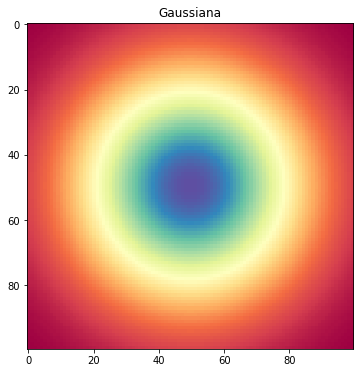

In [7]:
fig = plt.figure(figsize = (6, 6))
plt.imshow(gaussian, cmap='Spectral')
plt.title('Gaussiana')
plt.show()

## 4. Create a function that generates the image of a Gaussian optionally rotate by an angle $\theta$ and with mx, my, sx, sy as input arguments.

In [8]:
def gaussian(mx, my, sx, sy, theta=0):

    x = np.linspace(-1, 1, 100)
    y = x.copy()
    
    x, y = np.meshgrid(x, y)

    if theta != 0:
        theta_rad = theta * np.pi / 180
        # Rotation = | cos(θ) sin(θ)|
        #            |-sin(θ) cos(θ)|

        x_rotated = x*np.cos(theta_rad) + y*np.sin(theta_rad)
        y_rotated = -x*np.sin(theta_rad) + y*np.cos(theta_rad)
        x, y = x_rotated, y_rotated

    x_exp_gaussian = ((x - mx) / sx) ** 2
    y_exp_gaussian = ((y - my) / sy) ** 2

    x_gaussian = np.exp(-1/2 * (x_exp_gaussian + y_exp_gaussian)) / (sx * np.sqrt(2 * np.pi))
    y_gaussian = np.exp(-1/2 * (x_exp_gaussian + y_exp_gaussian)) / (sy * np.sqrt(2 * np.pi))

    gaussian = x_gaussian + y_gaussian

    return gaussian

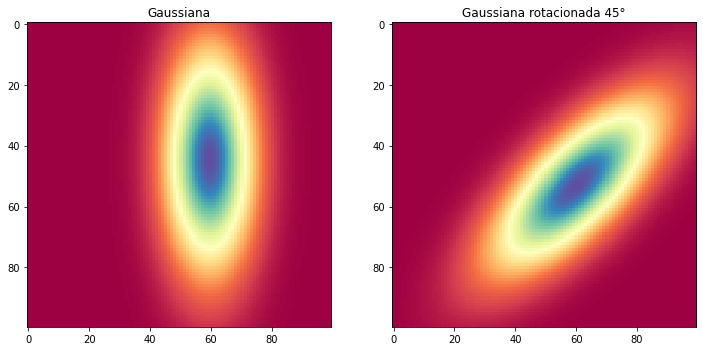

Parâmetros: mx=0.2, my=-0.1, sx=0.2, sy=0.5


In [9]:
mx, my, sx, sy, theta = .2, -.1, .2, .5, 45
g1 = gaussian(mx, my, sx, sy)
g2 = gaussian(mx, my, sx, sy, theta)

fig = plt.figure(figsize = (12, 6))

fig.add_subplot(121)
plt.imshow(g1, cmap='Spectral')
plt.title('Gaussiana')

fig.add_subplot(122)
plt.imshow(g2, cmap='Spectral')
plt.title(f'Gaussiana rotacionada {theta}°')

plt.show()

print(f'Parâmetros: mx={mx}, my={my}, sx={sx}, sy={sy}')